In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
from saturation.utils import *

import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter

In [3]:
n_cores = 22

spark = (
    SparkSession.builder
    .master(f"local[{n_cores}]")
    .appName("Saturation")
    .config("spark.sql.shuffle.partitions", "500")
    .config("spark.driver.memory", "40g")
    .config("spark.driver.maxResultSize", "8g")
    .getOrCreate()
)

25/03/05 09:18:45 WARN Utils: Your hostname, muninn resolves to a loopback address: 127.0.1.1; using 192.168.50.14 instead (on interface enp8s0)
25/03/05 09:18:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/05 09:18:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/03/05 09:18:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/03/05 09:18:45 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


# Configuration variables

In [4]:
BASE_PATH = "/data/saturation/thesis_run_20250223/"

STEEP_ID = 10
MODERATE_ID = 110
SHALLOW_ID = 150

DPI = 400
FONT_SIZE = 22
IMAGE_TYPE = "png"

# Load configurations

In [5]:
configs_pdf, configs_df, configs_dict = get_configs(
    base_path=BASE_PATH,
    spark=spark
)

25/03/05 09:18:47 WARN CacheManager: Asked to cache already cached data.


In [6]:
configs_pdf[configs_pdf.simulation_id.isin([STEEP_ID, MODERATE_ID, SHALLOW_ID])]

,mrp,rim_erasure_method,rmin,rmult,rstat,simulation_id,slope,stop_condition,study_region_padding,study_region_size,rim_erasure_exponent,rim_erasure_radius_ratio
103,0.5,"{'name': None, 'ratio': 3.0, 'exponent': 1.0}",0.37,1.0,3.0,110,-2.0,"{'name': 'nstat', 'nstat': '2500000'}",150,1200,1.0,3.0
114,0.5,"{'name': None, 'ratio': 3.0, 'exponent': 1.0}",0.37,1.0,3.0,150,-1.0,"{'name': 'nstat', 'nstat': '2500000'}",150,1200,1.0,3.0
144,0.5,"{'name': None, 'ratio': 3.0, 'exponent': 1.0}",0.37,1.0,3.0,10,-4.5,"{'name': 'nstat', 'nstat': '2500000'}",150,1200,1.0,3.0


# Load statistics

In [7]:
steep_stats = pd.read_parquet(f"data/statistics_{STEEP_ID}.parquet", columns=["radius", "lifespan"])
moderate_stats = pd.read_parquet(f"data/statistics_{MODERATE_ID}.parquet", columns=["radius", "lifespan"])
shallow_stats = pd.read_parquet(f"data/statistics_{SHALLOW_ID}.parquet", columns=["radius", "lifespan"])

# Plot at three slopes

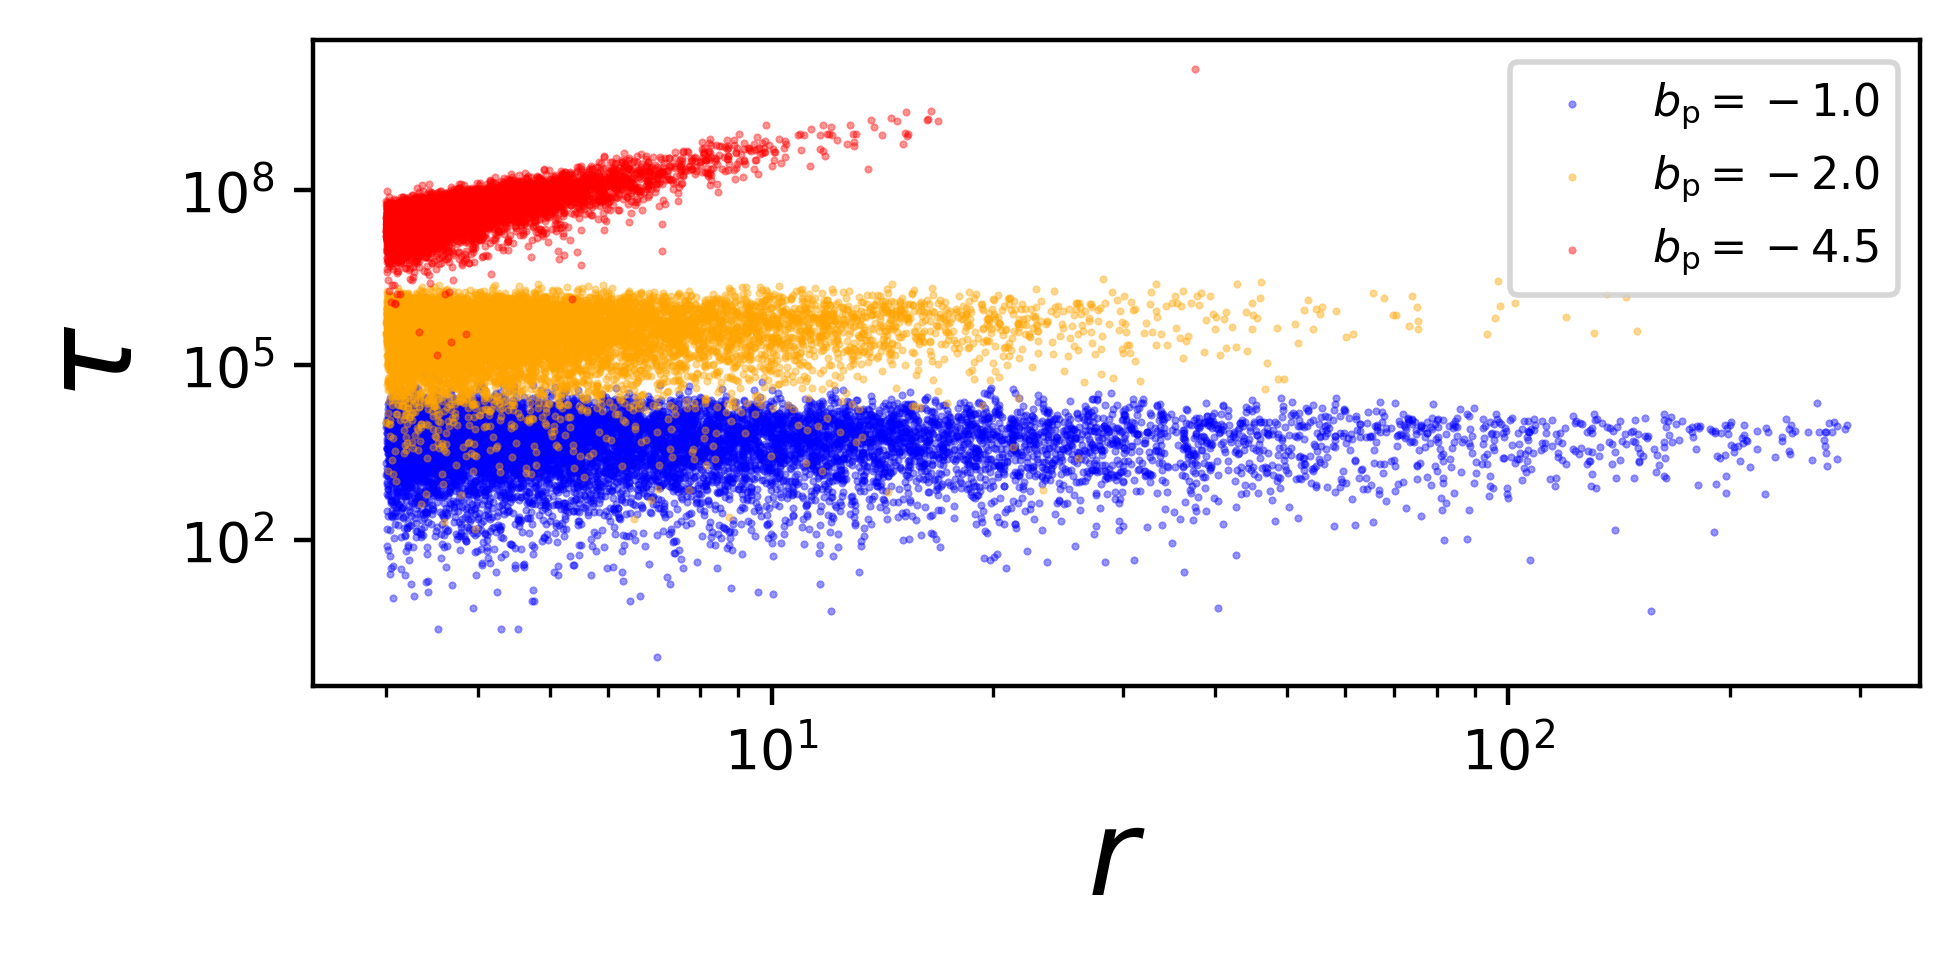

In [8]:
plt.figure(figsize=(5, 2.5), dpi=DPI)

shallow = shallow_stats.sample(frac=0.01)
moderate = moderate_stats.sample(frac=0.01)
steep = steep_stats.sample(frac=0.01)

plt.scatter(
    shallow.radius,
    shallow.lifespan,
    c="blue",
    s=.2,
    alpha=0.5,
    label=r"$b_{\text{p}} = -1.0$"
)

plt.scatter(
    moderate.radius,
    moderate.lifespan,
    c="orange",
    s=.2,
    alpha=0.5,
    label=r"$b_{\text{p}} = -2.0$"
)

plt.scatter(
    steep.radius,
    steep.lifespan,
    c="red",
    s=.2,
    alpha=0.5,
    label=r"$b_{\text{p}} = -4.5$"
)

plt.xscale("log")
plt.yscale("log")

ax = plt.gca()
ax.xaxis.set_major_locator(LogLocator(base=10, numticks=1))
ax.xaxis.set_minor_formatter(NullFormatter())

plt.xlabel("$r$", fontsize=FONT_SIZE)
plt.ylabel(fr"$\tau$", fontsize=FONT_SIZE)

plt.legend(fontsize=8)

plt.tight_layout()

plt.savefig(f"figures/multi_lifespans_scatter.{IMAGE_TYPE}", bbox_inches="tight")
plt.show()